# spectrum reading

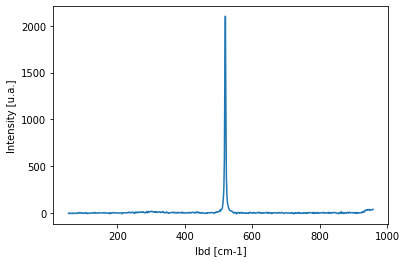

In [2]:
import raman_hyperspectra as rhp

file = "C:\\my_modules_Python\\rhp_demo_files\\RENISHAW_1D_Si.txt"
da_sliced, da_sliced_interp, da, da_interp = rhp.read_RAMAN_RENISHAW_0D(file)
da_sliced_interp.plot()


In [3]:
print(f"tool: {da_sliced.attrs['tool']}", 
      f"mean spectral resolution: {da_sliced.lbd.attrs['spectral_resolution']:.2f} {da_sliced.lbd.attrs['units']}",sep ="\n"  )

tool: RENIHAW
mean spectral resolution: 1.57 cm-1


# hyperspectrum reading

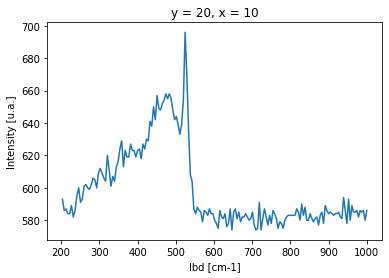

In [4]:
file = "C:\\my_modules_Python\\rhp_demo_files\\Large Area Scan_000_Spec_As cut.txt"
da_sliced, da_sliced_interp, da_full_spectrum, da_full_spectrum_interp = rhp.read_RAMAN_WITEC_2D(file,200,1000)
da_sliced.sel(x=10,y=20).plot()

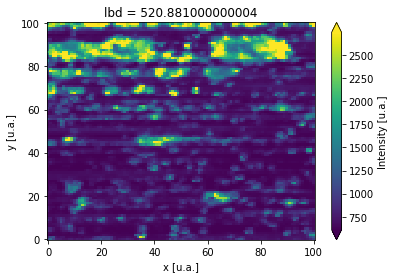

In [5]:
da_full_spectrum_interp.sel(lbd =521, method = "nearest").plot(robust=True)

# PCA analysis of an hyperspectrum

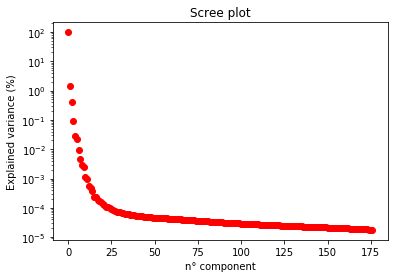

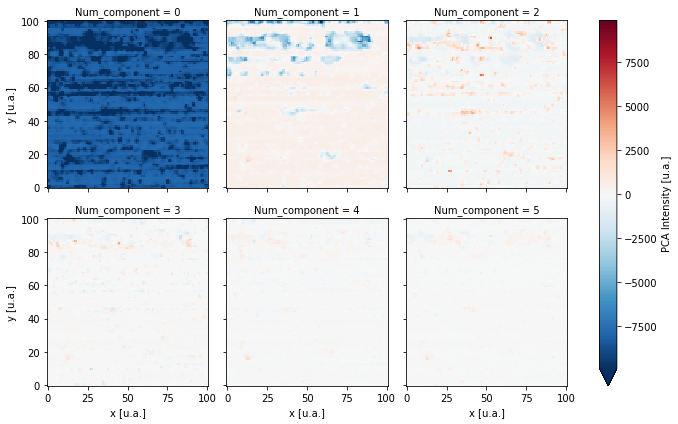

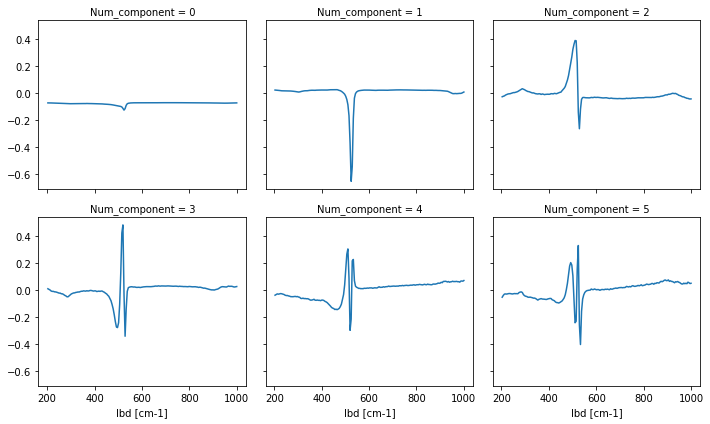

In [6]:
Eigen_value, F, L = rhp.Raman_PCA(da_sliced, k_PCA=6)

# NMF analysis of an hyperspectrum

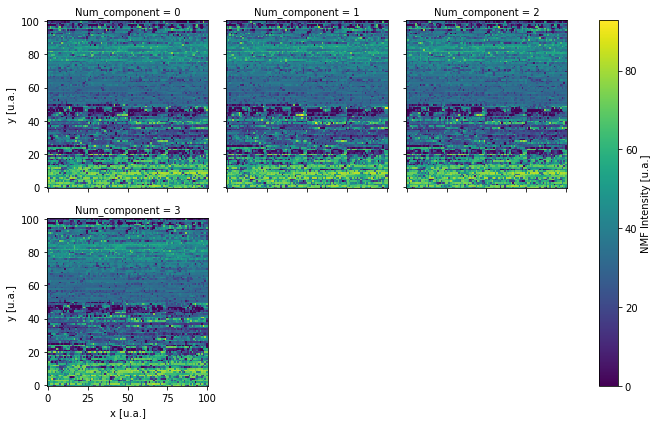

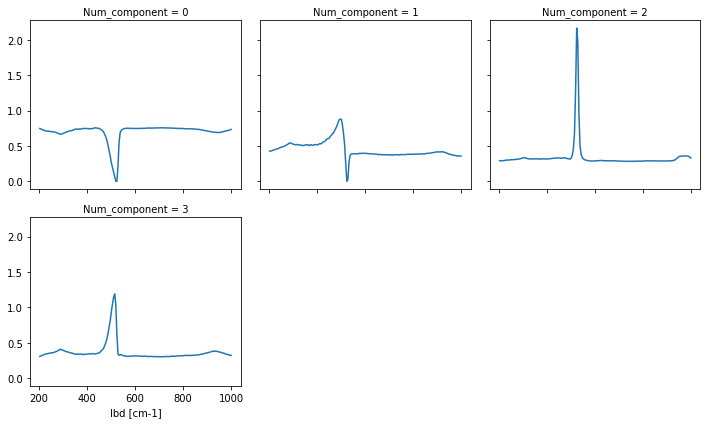

In [7]:
W,H = rhp.Raman_NMF(da_sliced,k_NMF = 4)

# cosmic cleaning

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
da_sliced.isel(x=60,y=50, lbd= 30).values += 300 # add a spike
da_cosmic = rhp.cosmic_cleaning (da_sliced,Kmax = 17)
da_sliced.isel(x=60,y=50).plot(label ='with one cosmic')
da_cosmic.isel(x=60,y=50).plot(label ='after cleaning')
plt.legend()

In [ ]:
da_sliced.isel(x=10,y=20, lbd= 60).values

In [2]:
import raman_hyperspectra as rhp


In [ ]:
import os
from PIL import Image

frame_duration = 1000  # in ms
os.chdir(r"C:\Temp\animated_GIF")
file_names = sorted((fn for fn in os.listdir('.') if fn.endswith('.PNG')))
images = [Image.open(fn) for fn in file_names]
images[0].save(
    "animated.gif",
    format="GIF",
    append_images=images[1:],
    save_all=True,
    duration=frame_duration,
    loop=0,
)

In [8]:
print(rhp.raman_hyperspectra_fit.__doc__)


Fits, using  the mean square method, a spectra/hyperstra. The ojective function is a sum of:
    - Gaussian(s)
    - bigaussian(s)
    - Lorentzian(s)
    - Voigt(s)
    - pseudo Voigt(s)
    
The fitting parameters are stored in an Excel file. 
To obtain an initialization file, copy and paste the 6 following lines in an csv file (for a Gaussian model)


FITTING MODEL INITIALIZATION														
Function type (column A) : Gaussian, Lorentzian, Bigaussian, Voigt, Pseudo_Voigt 														
B6 offset, B7,B8... C7,C8...must be blank. mask=1/0 the parameter is free/freezed.  Lbd_0, sigma_a, gamma are expressed in cm^-1														
														
 ;offset;mask;Lbd_0;mask;h;mask;sigma_a (w_a);mask;sigma_b;mask;gamma;mask;gamma;mask
Gaussian;0;	0;	521;	1;	10;	1;	5;	1;;;;;;

This file is parsed by the function init_model:
     param_fixed ,param_fit,func_type,mask,index_fit ,label,dic_mask = init_model( file)

Internal fuctions:
 wrapper_fit_func

3rd party dependencies: pandas, numpy, sc

In [3]:
param_fixed ,param_fit, func_type, mask, index_fit, label, dic_mask  = rhp.init_model(r'c:\Temp\modele.csv')
print(f'param_fixed :{param_fixed}',f'param_fit :{param_fit}',f'func_type :{list(func_type)}' , \
      f'mask:{mask}' ,f'index_fit: {index_fit}',f'label: {label} ',f'dic_mask :{dic_mask}', sep='\n')

param_fixed :[0.0, 0, 0, 0]
param_fit :[521.0, 10.0, 5.0]
func_type :['Gaussian0']
mask:[0. 1. 1. 1.]
index_fit: [1, 2, 3]
label: ['Gaussian0  :  Lbd_0 = 521.0 ', 'Gaussian0  :  h = 10.0 ', 'Gaussian0  :  sigma_a = 5.0 '] 
dic_mask :{1: 0, 2: 1, 3: 2}


In [10]:
print(f'param_fixed :{param_fixed}',f'param_fit :{param_fit}',f'func_type :{list(func_type)}' , \
      f'mask:{mask}' ,f'index_fit: {index_fit}',f'label: {label} ',f'dic_mask :{dic_mask}', sep='\n')

param_fixed :[0.0, 0, 0, 0]
param_fit :[521.0, 10.0, 5.0]
func_type :['Gaussian0']
mask:[0. 1. 1. 1.]
index_fit: [1, 2, 3]
label: ['Gaussian0  :  Lbd_0 = 521.0 ', 'Gaussian0  :  h = 10.0 ', 'Gaussian0  :  sigma_a = 5.0 '] 
dic_mask :{1: 0, 2: 1, 3: 2}


In [ ]:
rhp.raman_hyperspectra_baseline.